<a href="https://colab.research.google.com/github/fagonzalezo/qmc/blob/master/examples/qmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install qmc if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !pip install git+https://github.com/fagonzalezo/qmc.git
else:
    import sys
    sys.path.insert(0, "../")

In [2]:
%matplotlib inline
import numpy as np
import pylab as pl

# Function to visualize a 2D dataset
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Function to visualize the decission surface of a classifier
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 50)
    y_vals = np.linspace(min_y, max_y, 50)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    vals = [[XX[i, j], YY[i, j]] for i in range(grid_r) for j in range(grid_c)]
    preds = pred_fun(np.array(vals))
    ZZ = np.reshape(preds, (grid_r, grid_c))
    print(np.min(preds), np.min(ZZ))
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    CS = pl.contour(XX, YY, ZZ, 100, levels = [0.1*i for i in range(1,10)])
    pl.clabel(CS, inline=1, fontsize=10)
    pl.xlabel("x")
    pl.ylabel("y")

def gen_pred_fun(clf):
    def pred_fun(X):
        return clf.predict(X)[:, 1]
    return pred_fun

### Two moons example

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import qmc.tf.layers as layers
import qmc.tf.models as models


In [4]:
X, y = make_moons(n_samples=2000, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [5]:
#fm_x = layers.QFeatureMapRFF(dim=1000, gamma=100)
fm_x = layers.QFeatureMapSmp(dim=4, beta=40)
x_in_dim = 2
x_out_dim = fm_x.compute_output_shape((1, x_in_dim))[1]
fm_y = layers.QFeatureMapOneHot(num_classes=2)
qmclf = models.QMClassifier(fm_x, fm_y, dim_x=x_out_dim, dim_y=2)
qmclf.compile()
qmclf.fit(X_train, y_train, epochs=1)
out = qmclf.predict(X_test)
print(out[:10])

42/42 [==============================] - 0s 368us/step - loss: 0.0000e+00
[[0.12235586 0.8776441 ]
 [0.6945926  0.3054074 ]
 [0.2375321  0.7624679 ]
 [0.12550153 0.8744985 ]
 [0.31923258 0.68076736]
 [0.88959247 0.11040765]
 [0.61232704 0.38767314]
 [0.18307695 0.81692296]
 [0.84580094 0.15419899]
 [0.19183566 0.8081645 ]]


In [6]:
accuracy_score(y_test, out[:,1] >= 0.5)

0.9015151515151515

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
0.0020594515 0.0020594515


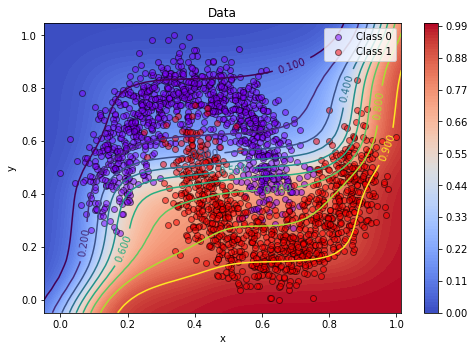

In [7]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmclf))
plot_data(X, y)

In [8]:
fm_x = layers.QFeatureMapRFF(2, dim=150, gamma=20, random_state=17)
fm_y = layers.QFeatureMapOneHot(num_classes=2)
qmclf = models.QMClassifier(fm_x, fm_y, dim_x=150, dim_y=2)
qmclf.compile()
qmclf.fit(X_train, y_train, epochs=1)
out = qmclf.predict(X_test)
print(out[:10])


42/42 [==============================] - 0s 1ms/step - loss: 0.0000e+00
[[0.13299656 0.8670033 ]
 [0.71164364 0.28835568]
 [0.10563792 0.89436233]
 [0.13841362 0.8615861 ]
 [0.4325836  0.5674165 ]
 [0.92546386 0.07453602]
 [0.41180342 0.5881965 ]
 [0.1396376  0.8603626 ]
 [0.8561922  0.14380796]
 [0.1678624  0.8321375 ]]


0.9333333333333333
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
0.018187225 0.018187225


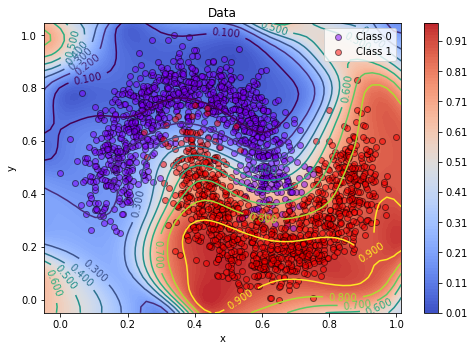

In [9]:
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmclf))
plot_data(X, y)

In [10]:
qmclf.summary()

Model: "qm_classifier_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
q_feature_map_rff (QFeatureM multiple                  450       
_________________________________________________________________
q_feature_map_one_hot_1 (QFe multiple                  0         
_________________________________________________________________
q_measure_classif_1 (QMeasur multiple                  90000     
_________________________________________________________________
density_matrix2dist_1 (Densi multiple                  0         
_________________________________________________________________
cross_product_2 (CrossProduc multiple                  0         
_________________________________________________________________
cross_product_3 (CrossProduc multiple                  0         
Total params: 90,451
Trainable params: 90,450
Non-trainable params: 1
_______________________________________________

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
0.9333333333333333
0.018187232 0.018187232


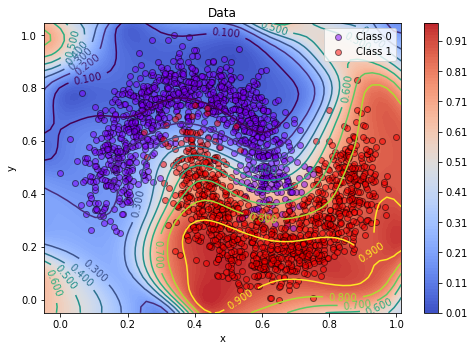

In [11]:
qmc1 = models.QMClassifierSGD(input_dim=2, dim_x=150, dim_y=2, gamma=20, random_state=17)
eig_vals = qmc1.set_rho(qmclf.get_rho())
out = qmc1.predict(X_test)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc1))
plot_data(X, y)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0000011>

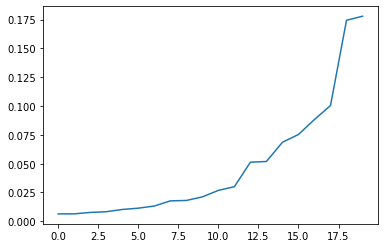

In [12]:
pl.plot(eig_vals[-20:])
tf.reduce_sum(eig_vals)

In [13]:
qmc1.summary()

Model: "qm_classifier_sgd"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
q_feature_map_rff_1 (QFeatur multiple                  450       
_________________________________________________________________
q_measure_classif_eig (QMeas multiple                  90300     
_________________________________________________________________
density_matrix2dist_2 (Densi multiple                  0         
Total params: 90,750
Trainable params: 90,750
Non-trainable params: 0
_________________________________________________________________


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
24.5 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.9333333333333333
1.57724e-05 1.57724e-05


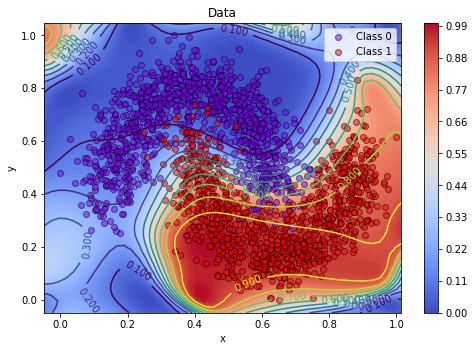

In [14]:
qmc1 = models.QMClassifierSGD(input_dim=2, dim_x=150, num_eig=5, dim_y=2, gamma=20, random_state=17)
eig_vals = qmc1.set_rho(qmclf.get_rho())
%timeit out = qmc1.predict(X_test)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc1))
plot_data(X, y)

In [15]:
qmc1.summary()

Model: "qm_classifier_sgd_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
q_feature_map_rff_2 (QFeatur multiple                  450       
_________________________________________________________________
q_measure_classif_eig_1 (QMe multiple                  1505      
_________________________________________________________________
density_matrix2dist_3 (Densi multiple                  0         
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________


In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
qmc1 = models.QMClassifierSGD(2, 150, 2, num_eig=5, gamma=20, random_state=17)
qmc1.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
qmc1.set_rho(qmclf.get_rho())
y_train_bin = tf.reshape (tf.keras.backend.one_hot(y_train, 2), (-1,2))
qmc1.fit(X_train, y_train_bin, epochs=1)


42/42 [==============================] - 0s 744us/step - loss: 0.1664


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
0.9696969696969697
0.00056624296 0.00056624296


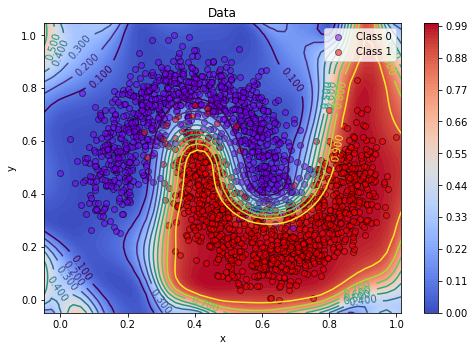

In [17]:
out = qmc1.predict(X_test)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))
plot_decision_region(X_test, gen_pred_fun(qmc1))
plot_data(X, y)

# Test  `QMClassifSDecompFDMatrix`

(248, 0.00995694)
0.9378787878787879
0.011266401 0.011266401
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


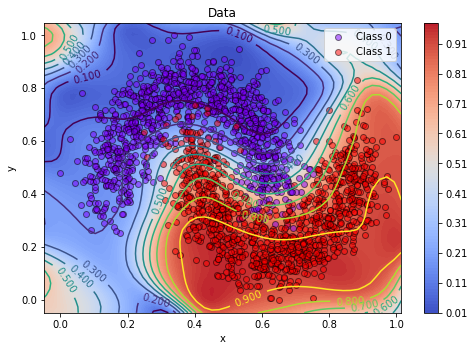

In [24]:
inputs = tf.keras.Input(shape=(2,))
psi_x = fm_x(inputs)
ones = tf.fill((tf.shape(inputs)[0], 1), 1.0)
rho_x = tf.keras.layers.concatenate((ones, psi_x), axis=1)
rho_x = tf.expand_dims(rho_x, axis=-1)
qmdmc = layers.QMClassifSDecompFDMatrix(dim_x=150, dim_y=2, n_comp=30)
rho_y = qmdmc(rho_x)
y_w = rho_y[:, 0, :] # shape (b, d_in)
y_v = rho_y[:, 1:, :] # shape (b, dim_x, d_in)
probs = tf.einsum('...j,...ij,...ij->...i', y_w, y_v, tf.math.conj(y_v))
#probs = probs / tf.expand_dims(tf.reduce_sum(probs, axis=1), axis=-1)
model = tf.keras.Model(inputs=inputs, outputs=probs)
print(qmdmc.set_rho(qmclf.get_rho()))
out = model.predict(X_test)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(model))
plot_data(X, y)


In [25]:
model.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
model.fit(X_train, y_train_bin, epochs=1)

42/42 [==============================] - 0s 1ms/step - loss: 0.1393


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
0.9727272727272728
0.00072028313 0.00072028313


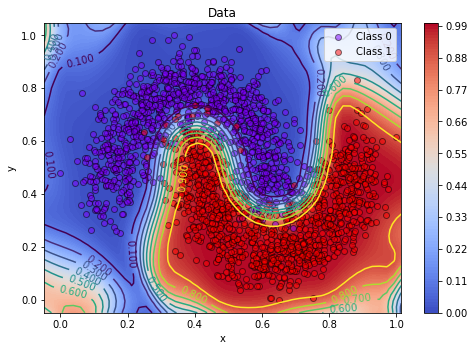

In [26]:
out = model.predict(X_test)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(model))
plot_data(X, y)
